In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install scikit-learn

In [3]:
from sklearn.datasets import fetch_california_housing
load_california = fetch_california_housing()
X = load_california.data
Y = load_california.target

data = pd.DataFrame(X, columns = load_california.feature_names)
data["MedHouseVal"] = Y

In [4]:
print(data.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.4

In [5]:
print(load_california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
#Information about the pandas dataframe created 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


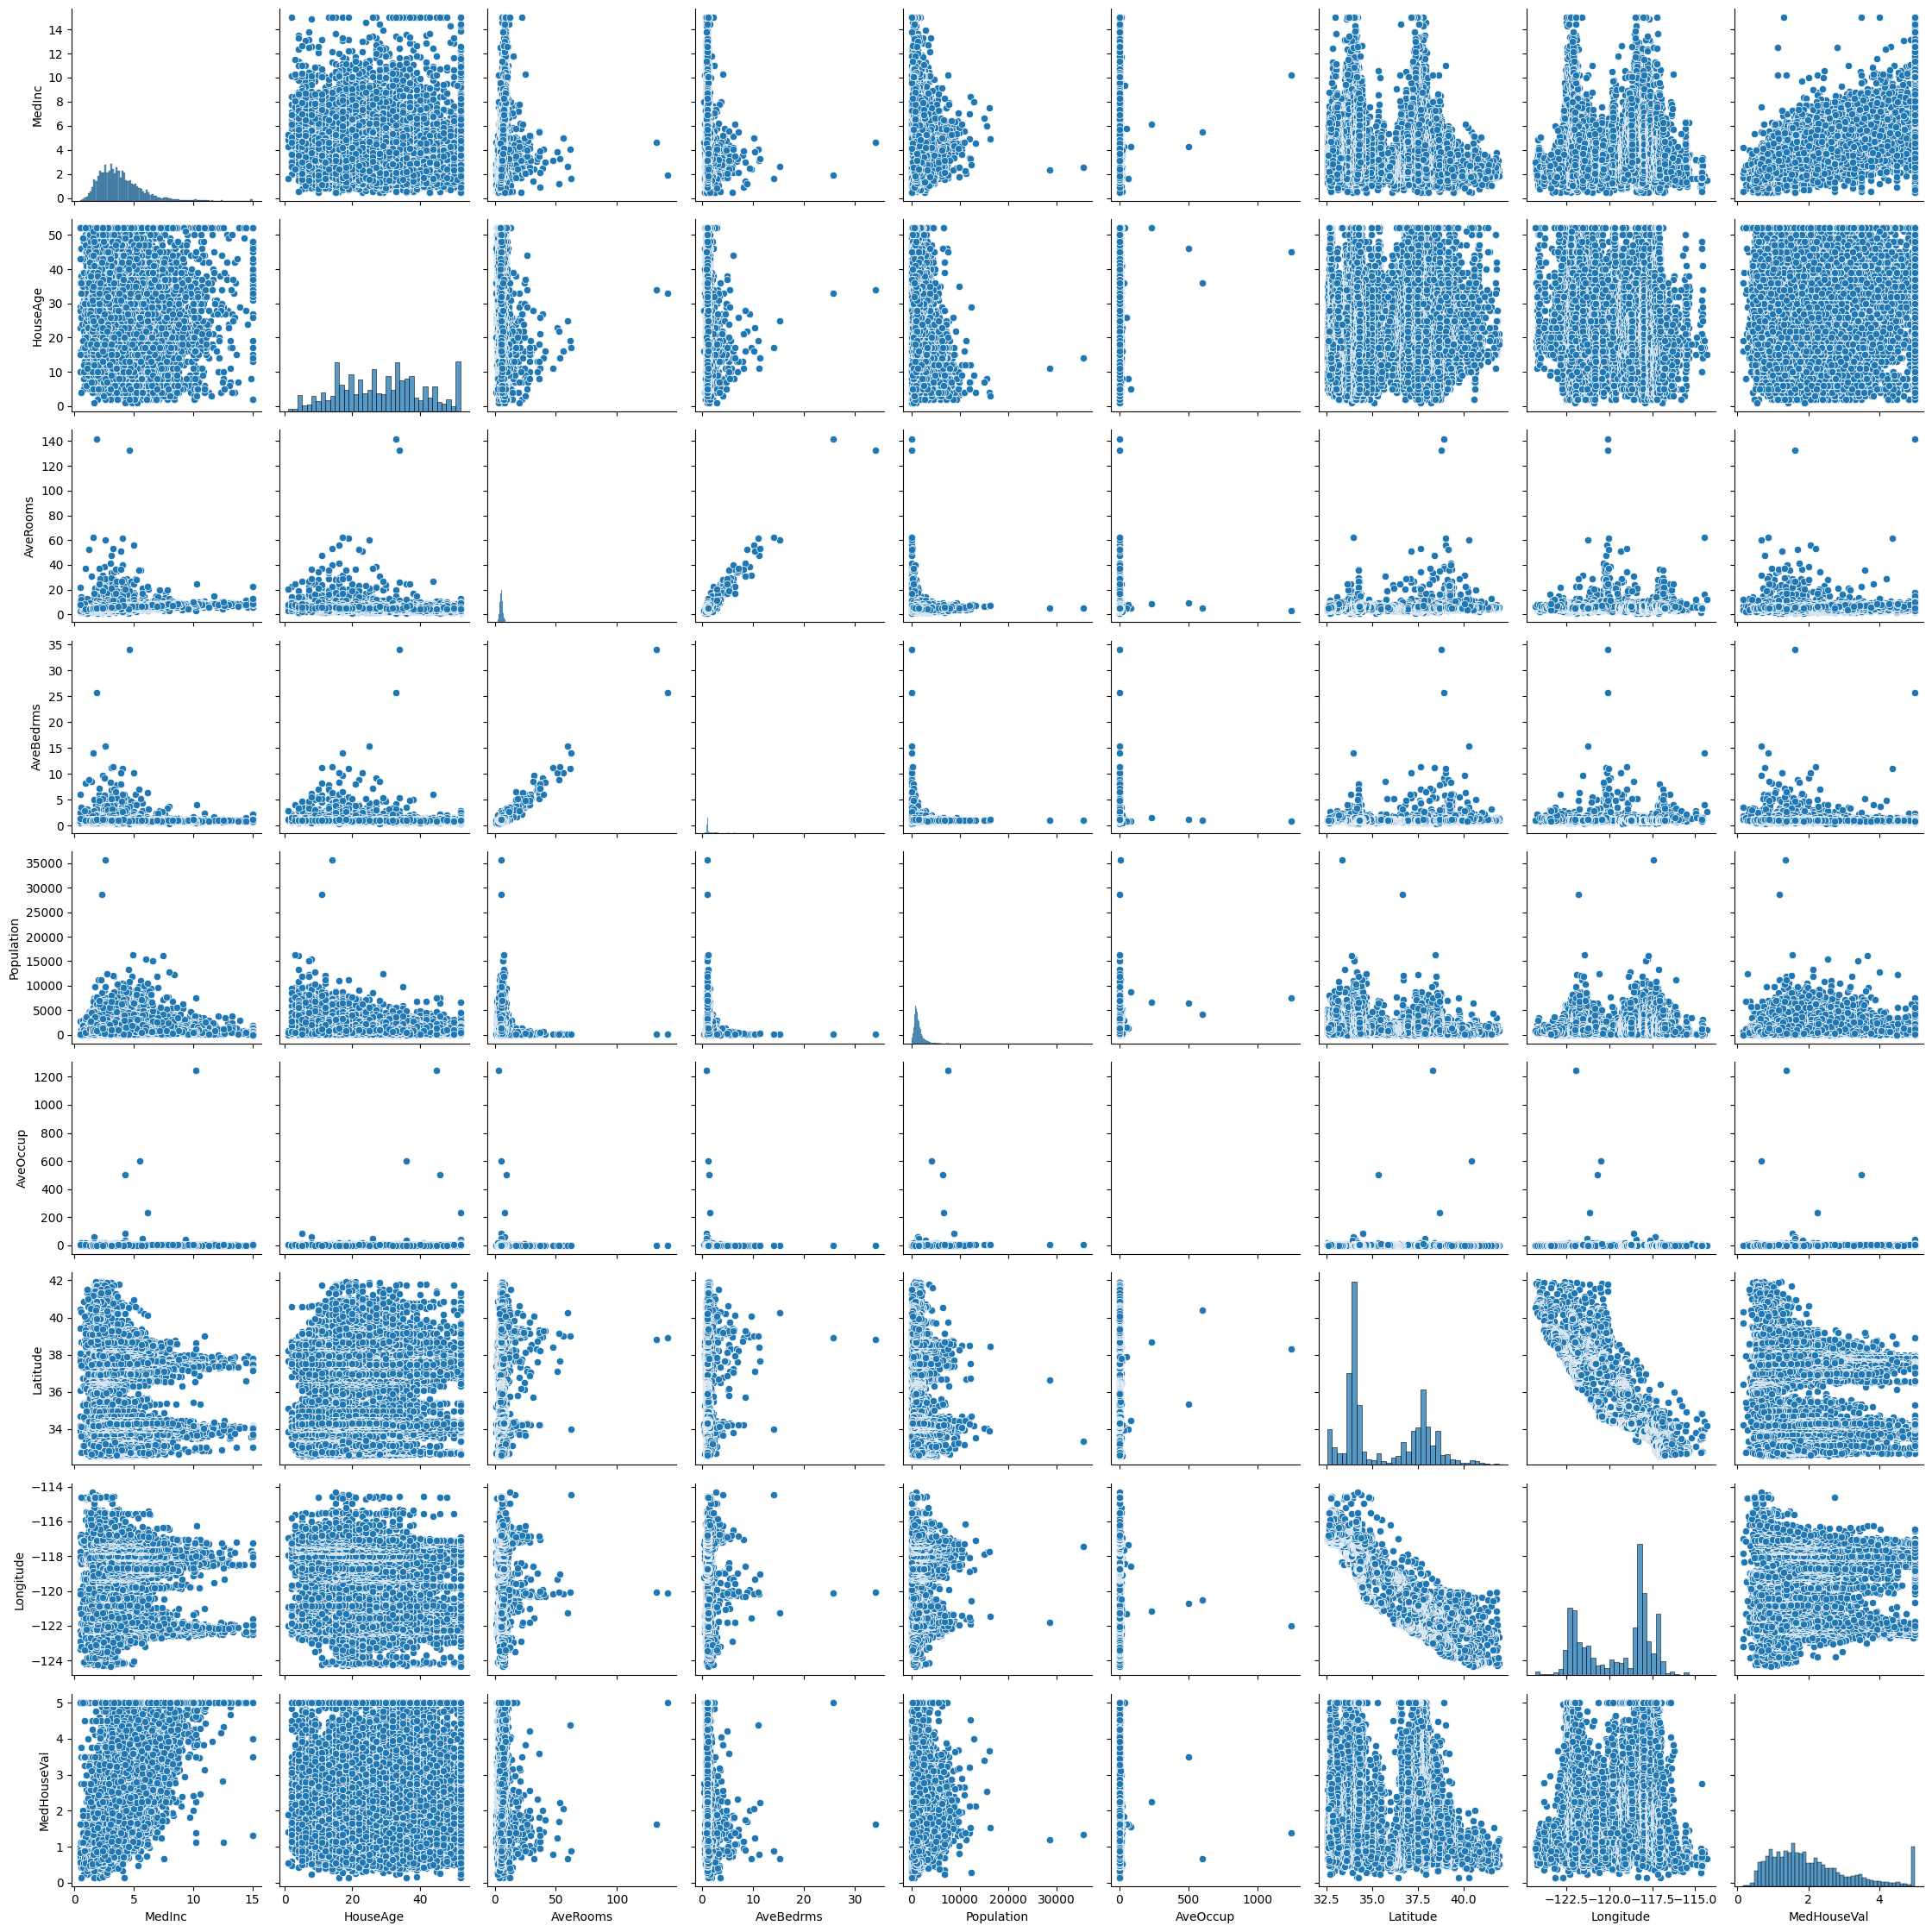

In [8]:
#plotting all the columns with resoect to each other 
sns.pairplot(data, height = 2.5)
plt.tight_layout()
plt.show()

In [15]:
!pip install scipy

In [7]:
from scipy import stats

In [8]:
from scipy.stats import norm, skew

C:\Users\pradeep\AppData\Local\Temp\ipykernel_126912\3911212056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MedHouseVal"], fit = norm)



 mu = 2.07 and sigma = 1.15



Text(0.5, 1.0, 'Median House Value Distribution')

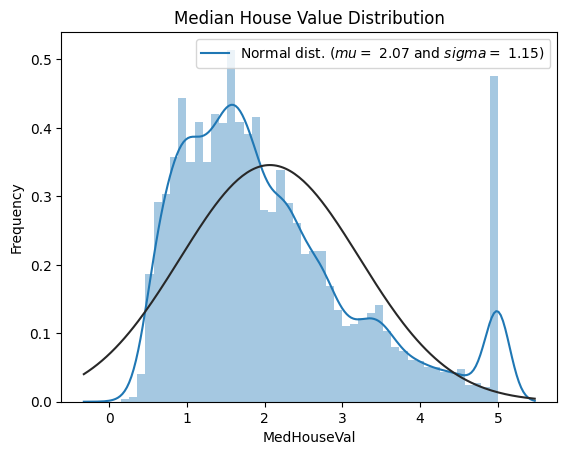

In [9]:
sns.distplot(data["MedHouseVal"], fit = norm)
(mu, sigma) = norm.fit(data["MedHouseVal"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

plt.legend(['Normal dist. ($mu=$ {:.2f} and $sigma=$ {:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Median House Value Distribution')

C:\Users\pradeep\AppData\Local\Temp\ipykernel_126912\4179771031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MedHouseVal"], fit = norm)



 mu = 1.06 and sigma = 0.36



Text(0.5, 1.0, 'Median House Value Distribution')

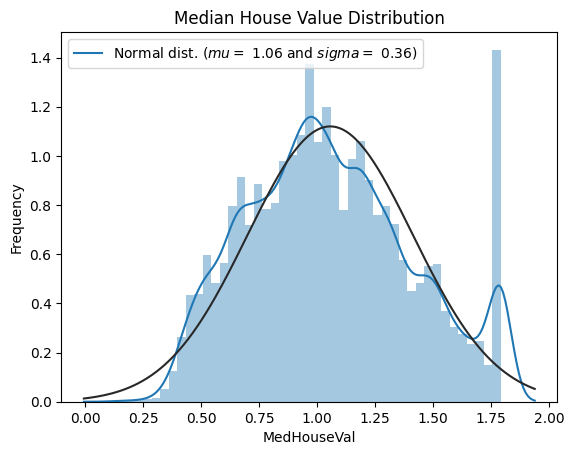

In [10]:
data['MedHouseVal'] = np.log1p(data['MedHouseVal'])

sns.distplot(data["MedHouseVal"], fit = norm)
(mu, sigma) = norm.fit(data["MedHouseVal"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

plt.legend(['Normal dist. ($mu=$ {:.2f} and $sigma=$ {:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Median House Value Distribution')

Text(0, 0.5, 'MedInc')

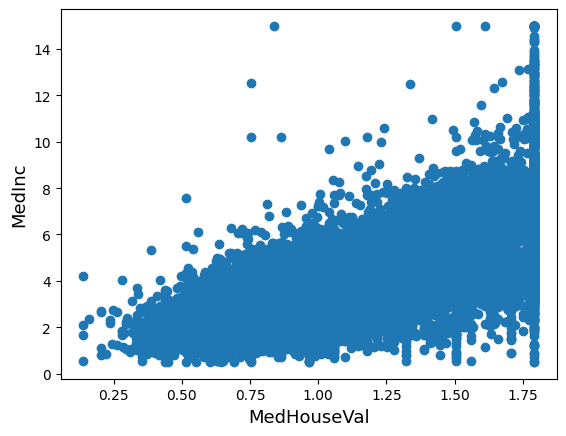

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data["MedHouseVal"], y = data["MedInc"])
plt.xlabel("MedHouseVal", fontsize = 13)
plt.ylabel("MedInc", fontsize = 13)

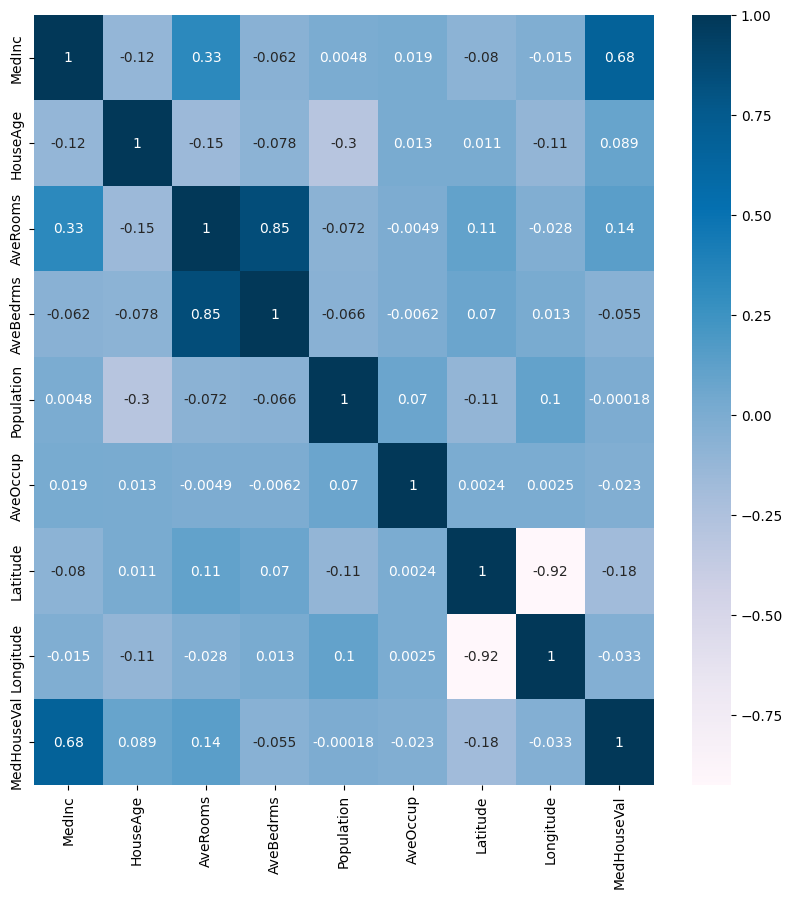

In [12]:
plt.figure(figsize = (10,10))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.PuBu)
plt.show()

In [54]:
corr_target = abs(corr['MedHouseVal']) #taking the absolute value of the correlation
relevant_features = corr_target[corr_target > 0.1] #highly correlated features
name = dict(relevant_features) #getting the names of the features
names = list(name.keys())
names.remove('MedHouseVal')

print(names)

['MedInc', 'AveRooms', 'Latitude']


MODEL BULDING

In [14]:
from sklearn.model_selection import train_test_split

In [55]:
X = data.drop(['MedHouseVal','Longitude','Population','AveOccup','AveBedrms','HouseAge'], axis = 1)
Y = data['MedHouseVal']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

print(X)

       MedInc  AveRooms  Latitude
0      8.3252  6.984127     37.88
1      8.3014  6.238137     37.86
2      7.2574  8.288136     37.85
3      5.6431  5.817352     37.85
4      3.8462  6.281853     37.85
...       ...       ...       ...
20635  1.5603  5.045455     39.48
20636  2.5568  6.114035     39.49
20637  1.7000  5.205543     39.43
20638  1.8672  5.329513     39.43
20639  2.3886  5.254717     39.37

[20640 rows x 3 columns]


In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [59]:
prediction = lr.predict(X_test)

print("Actual House Value ", Y_test[0])
print("Model Predicted Value ", prediction[0])

Actual House Value  1.7094642265012248
Model Predicted Value  0.777061360952487


In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, prediction)
rmse = np.sqrt(mse)
print(rmse)

0.2601141505098558


From my analysis, we can say that the linear regression model is not the best to train on this dataset. We can try other models which fit the dataset best.